<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


In [3]:
diag=gum.loadID(os.path.join("res","diag.bifxml"))
gnb.showInfluenceDiagram(diag,size="6",format='svg')

In [4]:
F=diag.addChanceNode(gum.LabelizedVariable("F","F",2))
diag.addArc(diag.idFromName("decisionVar1"),F)

U=diag.addUtilityNode(gum.LabelizedVariable("U","U",1))
diag.addArc(diag.idFromName("decisionVar3"),U)
diag.addArc(diag.idFromName("F"),U)

gnb.showInfluenceDiagram(diag,size="6",format="svg") 
# note the difference between png (above) and svg (here)rendering

In [5]:
diag.cpt(F)[{'decisionVar1':0}]=[0.9,0.1]
diag.cpt(F)[{'decisionVar1':1}]=[0.3,0.7]

diag.utility(U)[{'F':0,'decisionVar3':0}]=2
diag.utility(U)[{'F':0,'decisionVar3':1}]=4
diag.utility(U)[{'F':1}]=[[0],[5]]

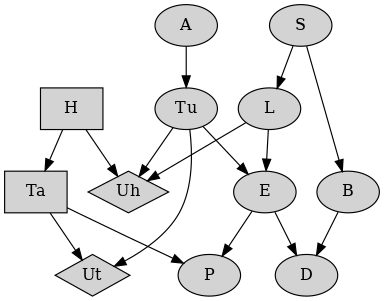

In [6]:
asia=gum.loadID(os.path.join("res","DecAsia.bifxml"))
gnb.showInfluenceDiagram(asia)

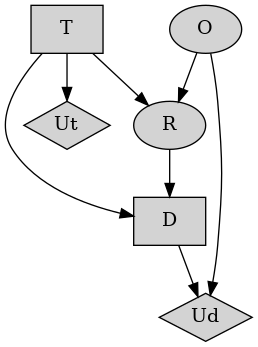

In [7]:
oil=gum.loadID(os.path.join("res","OilWildcater.bifxml"))
gnb.showInfluenceDiagram(oil)

In [8]:
ie=gum.InfluenceDiagramInference(oil)

In [9]:
ie.makeInference()
print("Best decision for T : {0}".format(ie.getBestDecisionChoice(oil.idFromName("T"))))
print("Best decision for D : {0}".format(ie.getBestDecisionChoice(oil.idFromName("D"))))
print("For a maxEU : {0}".format(ie.getMEU()))

Best decision for T : 1
Best decision for D : 1
For a maxEU : 60.0


In [10]:
print(oil.variable(3))

O<Dry,Wet,Soak>


In [11]:
ie.eraseAllEvidence()
ie.setEvidence({3:0})
ie.makeInference()
print("Best decision for T : {0}".format(ie.getBestDecisionChoice(oil.idFromName("T"))))
print("Best decision for D : {0}".format(ie.getBestDecisionChoice(oil.idFromName("D"))))
print("For a maxEU : {0}".format(ie.getMEU()))

Best decision for T : 1
Best decision for D : 1
For a maxEU : 0.0


In [12]:
ie.eraseAllEvidence()
ie.setEvidence({3:1})
ie.makeInference()
print("Best decision for T : {0}".format(ie.getBestDecisionChoice(oil.idFromName("T"))))
print("Best decision for D : {0}".format(ie.getBestDecisionChoice(oil.idFromName("D"))))
print("For a maxEU : {0}".format(ie.getMEU()))

Best decision for T : 1
Best decision for D : 0
For a maxEU : 60.0


In [13]:
ie.eraseAllEvidence()
ie.setEvidence({3:2})
ie.makeInference()
print("Best decision for T : {0}".format(ie.getBestDecisionChoice(oil.idFromName("T"))))
print("Best decision for D : {0}".format(ie.getBestDecisionChoice(oil.idFromName("D"))))
print("For a maxEU : {0}".format(ie.getMEU()))

Best decision for T : 1
Best decision for D : 0
For a maxEU : 10.0


In [14]:
ie.eraseAllEvidence()
ie.setEvidence({3:[1,0.5,0.1]})
ie.makeInference()
print("Best decision for T : {0}".format(ie.getBestDecisionChoice(oil.idFromName("T"))))
print("Best decision for D : {0}".format(ie.getBestDecisionChoice(oil.idFromName("D"))))
print("For a maxEU : {0}".format(ie.getMEU()))

Best decision for T : 1
Best decision for D : 1
For a maxEU : 30.0
